<a href="https://colab.research.google.com/github/hassanfarhan777/Reservoir_computing/blob/main/SinDy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## We use Sparse Identification of Non-linear Dynamics (Sindy) method to achieve the dynamical equation of the system from observational data

In [34]:
from sklearn.linear_model import Ridge
import numpy as np
import matplotlib.pyplot as plt

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Here I have used a dataset, but one can also generate the lorentz system (example of interest) from python as well

In [36]:
path = '/content/drive/MyDrive/lorenz_data.npy'
lorenz_data = np.load(path)

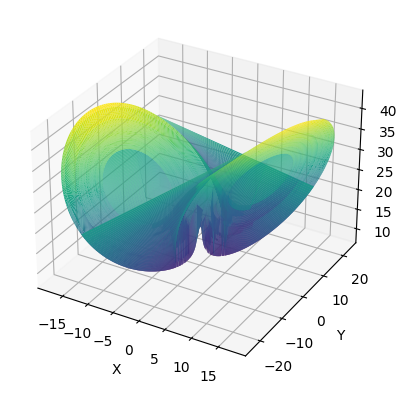

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate sample data
data = lorenz_data[5000:]  # Assuming 100 rows and 3 columns (x, y, z)

# Split the data into x, y, and z coordinates
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_trisurf(x, y, z, cmap='viridis')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


In [38]:
data.shape

(15001, 3)

## Generating higher order embedding to develop a phase space from which the dynamical equations can be obtained

In [39]:
x2 = x**2
y2 = y**2
z2 = z**2
xy = x * y
xz = x * z
yz = y * z

# Combine the components into ri
ri = np.column_stack((x, y, z, x2, y2, z2, xy, xz, yz))


In [40]:
ri.shape

(15001, 9)

In [41]:
data[:5]

array([[ 4.79545159,  8.84725956, 10.47443908],
       [ 4.87718421,  8.99878315, 10.50480296],
       [ 4.96032132,  9.15257589, 10.53797034],
       [ 5.04488009,  9.30864358, 10.5740252 ],
       [ 5.13087746,  9.46699005, 10.61305388]])

In [42]:
ri[:5]

array([[  4.79545159,   8.84725956,  10.47443908,  22.99635599,
         78.27400176, 109.71387403,  42.42660497,  50.22966558,
         92.6700813 ],
       [  4.87718421,   8.99878315,  10.50480296,  23.78692585,
         80.97809827, 110.35088523,  43.88872314,  51.23385916,
         94.53044392],
       [  4.96032132,   9.15257589,  10.53797034,  24.60478756,
         83.76964535, 111.0488189 ,  45.39971727,  52.27171892,
         96.44957323],
       [  5.04488009,   9.30864358,  10.5740252 ,  25.45081508,
         86.65084527, 111.8100089 ,  46.96099061,  53.34468915,
         98.42983176],
       [  5.13087746,   9.46699005,  10.61305388,  26.32590349,
         89.62390057, 112.63691271,  48.57396583,  54.45427892,
        100.47367548]])

## Evaluating change in position for all axes at each time step

In [43]:
sample_data = data

del_x = np.zeros(len(sample_data)-1)

for i in range(len(del_x)):
  del_x[i] = sample_data[i + 1, 0] - sample_data[i, 0]

print(del_x.shape)



(15000,)


In [44]:
del_y = np.zeros(len(sample_data)-1)

for i in range(len(del_y)):
  del_y[i] = sample_data[i + 1, 1] - sample_data[i, 1]

print(del_y.shape)


(15000,)


In [45]:
del_x[:10]

array([0.08173262, 0.0831371 , 0.08455877, 0.08599737, 0.08745263,
       0.08892423, 0.09041181, 0.09191495, 0.09343323, 0.09496613])

In [46]:
del_y[:10]

array([0.15152359, 0.15379273, 0.15606769, 0.15834647, 0.16062691,
       0.16290672, 0.16518345, 0.16745446, 0.16971699, 0.17196805])

In [47]:
del_z = np.zeros(len(sample_data)-1)

for i in range(len(del_z)):
  del_z[i] = sample_data[i + 1, 2] - sample_data[i, 2]

print(del_z.shape)

(15000,)


In [48]:
del_data = np.column_stack((del_x,del_y,del_z))

In [49]:
del_data[:3]

array([[0.08173262, 0.15152359, 0.03036388],
       [0.0831371 , 0.15379273, 0.03316738],
       [0.08455877, 0.15606769, 0.03605486]])

In [50]:
# Saving initial ri and fitting dimension
x_init = ri
ri = np.delete(ri,-1,axis=0)

# Saving initial del_data
Y = del_data

In [51]:
ri.shape

(15000, 9)

In [52]:
from sklearn . linear_model import Ridge

In [53]:
regressor = Ridge ( alpha =10** -8)
regressor . fit (ri , Y )

Ridge(alpha=1e-08)

In [54]:
W_out = regressor . coef_

In [55]:
W_out.shape

(3, 9)

In [56]:
final_values = np.round(W_out/0.002,decimals=1)

In [57]:
final_values

array([[-9.6,  9.9,  0. ,  0. , -0. , -0. , -0. , -0. , -0. ],
       [27.6, -0.6,  0. ,  0. , -0. , -0. , -0. , -1. , -0. ],
       [ 0. ,  0. , -2.5,  0. ,  0. , -0. ,  1. , -0. , -0. ]])

In [71]:

# values of the dynamical system obtain
